<a href="https://colab.research.google.com/github/Lahiru1Niroosh/SE4050-DL-Lab1-IT22568632/blob/main/DL%20LAB%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1: Python Libraries for Deep Learning**

1) Create a random 4×4 array from an exponential distribution

In [ ]:
# Core libs (already available in Colab, but explicit imports are helpful)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot defaults
plt.rcParams["figure.dpi"] = 120
sns.set_theme(context="notebook", style="whitegrid")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
path = "/content/drive/MyDrive/DL_Lab"
os.listdir(path)


['online_store_customer_data.csv',
 'Au_nanoparticle_dataset.csv',
 'DL LAB 01.ipynb',
 'LAB01',
 'LAB02']

In [ ]:
!cp "/content/drive/MyDrive/DL_Lab/online_store_customer_data.csv" .
!cp "/content/drive/MyDrive/DL_Lab/Au_nanoparticle_dataset.csv" .

In [ ]:
import pandas as pd
df = pd.read_csv("online_store_customer_data.csv")
df.head()


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


In [ ]:
au_path = "/content/drive/MyDrive/DL_Lab/Au_nanoparticle_dataset.csv"
au_df = pd.read_csv(au_path)
au_df.head()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


In [ ]:
rng = np.random.default_rng(seed=42)
A = rng.exponential(scale=1.0, size=(4, 4))
print(A)


[[2.4042086  2.33618966 2.384761   0.27979429]
 [0.0864374  1.45266052 1.40996069 3.12429596]
 [0.0792942  1.04656085 0.07043631 1.08902363]
 [1.73132735 0.38689482 1.23158566 0.15377325]]


In [ ]:
# Core libs (already available in Colab, but explicit imports are helpful)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot defaults
plt.rcParams["figure.dpi"] = 120
sns.set_theme(context="notebook", style="whitegrid")


In [ ]:
rng = np.random.default_rng(seed=42)
A = rng.exponential(scale=1.0, size=(4, 4))
print(A)


[[2.4042086  2.33618966 2.384761   0.27979429]
 [0.0864374  1.45266052 1.40996069 3.12429596]
 [0.0792942  1.04656085 0.07043631 1.08902363]
 [1.73132735 0.38689482 1.23158566 0.15377325]]


2) Draw 100000 samples and visualize Exponential vs Uniform vs Normal

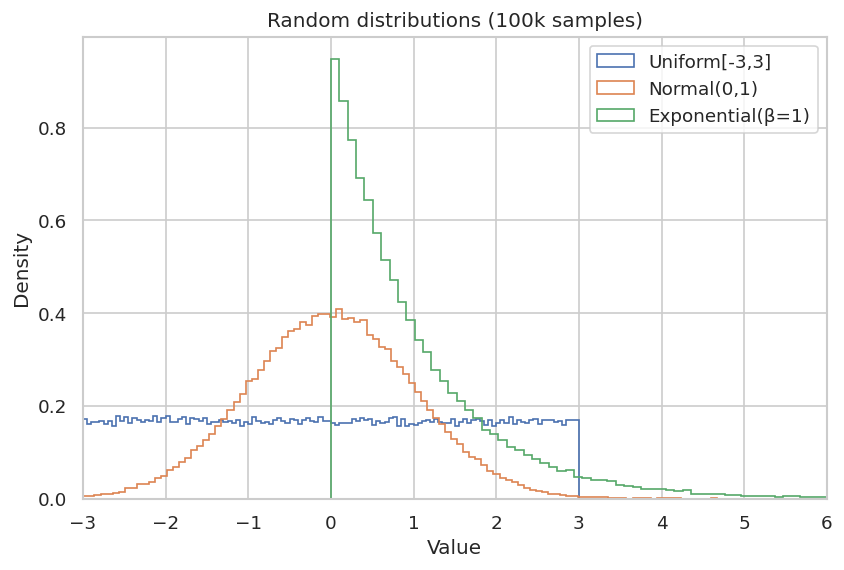

In [ ]:
N = 100_000
rng = np.random.default_rng(42)

samples_exp = rng.exponential(scale=1.0, size=N)     # x >= 0
samples_uni = rng.uniform(low=-3, high=3, size=N)    # roughly centered
samples_norm = rng.normal(loc=0, scale=1, size=N)    # standard normal

plt.figure(figsize=(8,5))
plt.hist(samples_uni,  bins=120, density=True, histtype="step", label="Uniform[-3,3]")
plt.hist(samples_norm, bins=120, density=True, histtype="step", label="Normal(0,1)")
plt.hist(samples_exp,  bins=120, density=True, histtype="step", label="Exponential(β=1)")
plt.title("Random distributions (100k samples)")
plt.xlabel("Value"); plt.ylabel("Density"); plt.legend()
plt.xlim(-3, 6)    # show the right tail of exponential as well
plt.show()


3) 3D plot of
𝑍
=
𝑋
2
+
𝑌
2
Z=X
2
+Y
2
 for
𝑥
,
𝑦
∈
[
−
5
,
5
]
x,y∈[−5,5]

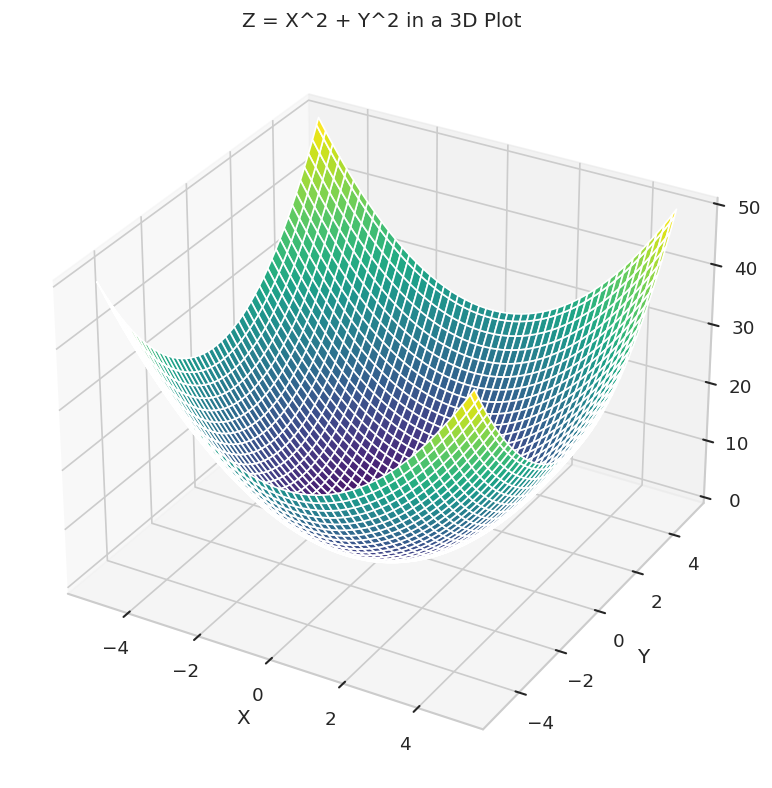

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate x and y values from -5 to 5
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a grid for x and y
X, Y = np.meshgrid(x, y)

# Calculate Z = X**2 + Y**2
Z = X**2 + Y**2

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Z = X^2 + Y^2 in a 3D Plot')
plt.show()

4) Pearson & Spearman correlations for [HP, Attack, Defense, Sp. Atk, Sp. Def, Speed] and heatmaps

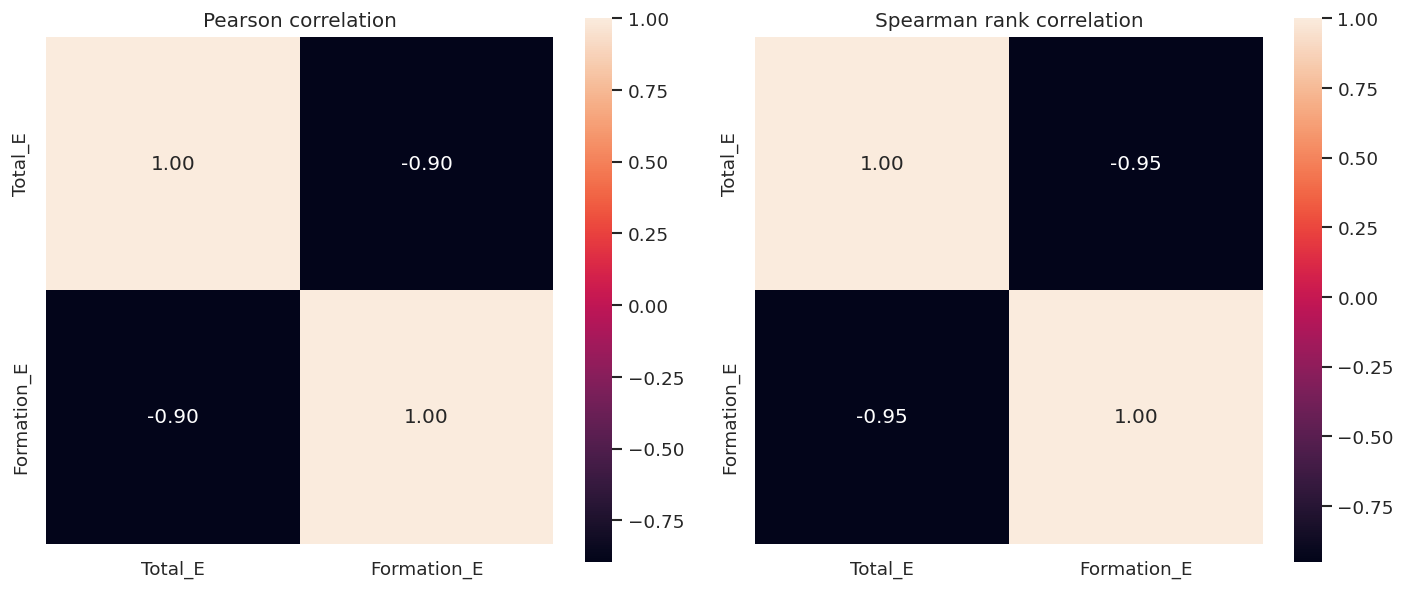

In [ ]:
cols = ["Total_E", "Formation_E"] # Assuming these are the intended columns based on au_df
num = au_df[cols].dropna()

pearson = num.corr(method="pearson")
spearman = num.corr(method="spearman")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(pearson,  annot=True, fmt=".2f", square=True, ax=axes[0])
axes[0].set_title("Pearson correlation")
sns.heatmap(spearman, annot=True, fmt=".2f", square=True, ax=axes[1])
axes[1].set_title("Spearman rank correlation")
plt.tight_layout(); plt.show()

**Task 2 (Au nanoparticle CSV)**

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/DL_Lab/Au_nanoparticle_dataset.csv"
df = pd.read_csv(path)
df.head()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
0,1,273,0.000025,1,1599,1014,585,2.710000e-26,15.5898,19.4516,...,0,0,0,0,0,0,0,0,-5908.6345,343.4555
1,2,273,0.000025,2,1642,1034,608,2.780000e-26,15.3996,24.1755,...,0,0,0,0,0,0,0,0,-6035.4034,384.8166
2,3,273,0.000025,3,4637,3365,1272,7.850000e-26,21.9199,31.0305,...,0,0,0,0,0,0,0,0,-17330.1660,800.5040
3,4,273,0.000025,4,7189,5292,1897,1.220000e-25,23.2542,37.8795,...,0,0,0,0,0,0,0,0,-26937.2010,1171.7890
4,5,273,0.000025,5,11004,8508,2496,1.860000e-25,27.1200,39.7614,...,0,0,0,0,0,0,0,0,-41427.9010,1597.7390


Filter the DataFrame:

In [ ]:
keep = ["N_total", "N_bulk", "N_surface", "R_avg"]
new_df = au_df[keep].copy()
new_df.head()


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831


Display the first 20 rows:

In [ ]:
new_df.head(20)


,N_total,N_bulk,N_surface,R_avg
0,1599,1014,585,17.3706
1,1642,1034,608,17.6061
2,4637,3365,1272,25.3692
3,7189,5292,1897,29.7011
4,11004,8508,2496,34.2831
5,13375,10768,2607,36.6334
6,13795,11155,2640,37.0108
7,13947,11304,2643,37.1672
8,14020,11357,2663,37.2103
9,14056,11389,2667,37.2467


Compute statistics (mean, std, quartiles):

In [ ]:
summary = pd.concat([
    new_df.mean().rename("mean"),
    new_df.std(ddof=1).rename("std"),
    new_df.quantile(0.25).rename("Q1"),
    new_df.quantile(0.50).rename("Median"),
    new_df.quantile(0.75).rename("Q3"),
], axis=1)
summary


,mean,std,Q1,Median,Q3
N_total,3476.786500,3679.286769,1061.000000,1867.00000,4503.000000
N_bulk,2521.550250,2976.232459,618.750000,1199.00000,3183.000000
N_surface,955.236250,721.870220,437.000000,666.00000,1301.750000
R_avg,20.654363,7.610716,15.160725,18.62925,25.525125


Plot 1×4 histograms:

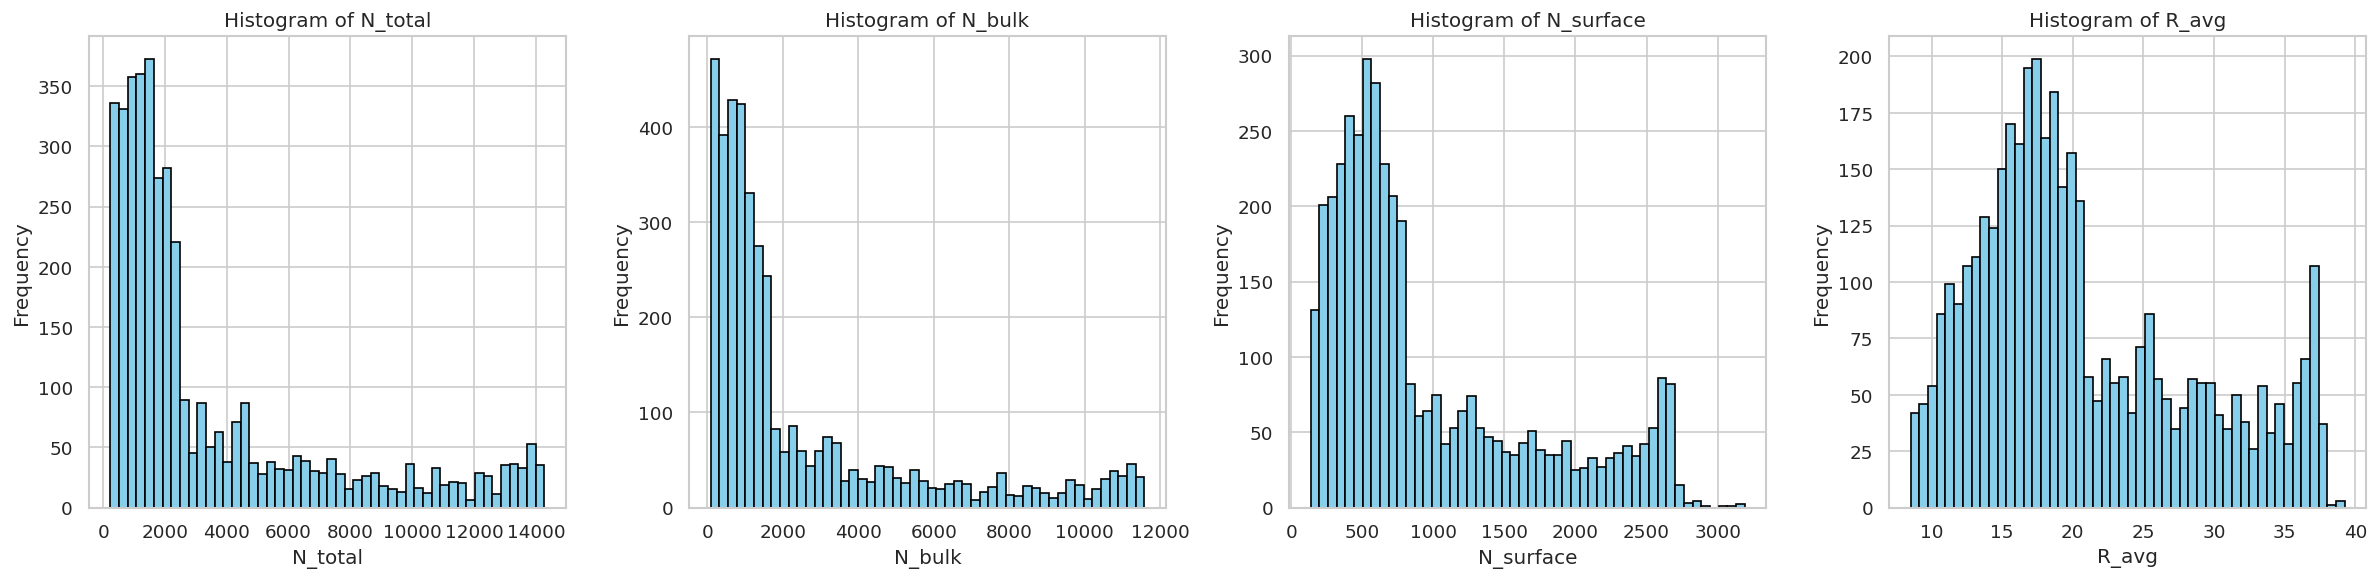

In [ ]:
# Create a 1x4 subplot layout
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Loop through the columns and plot a histogram for each
for i, col in enumerate(new_df.columns):
    axes[i].hist(new_df[col], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout() # Adjust subplot params so that subplots are nicely fit in the figure
plt.show()

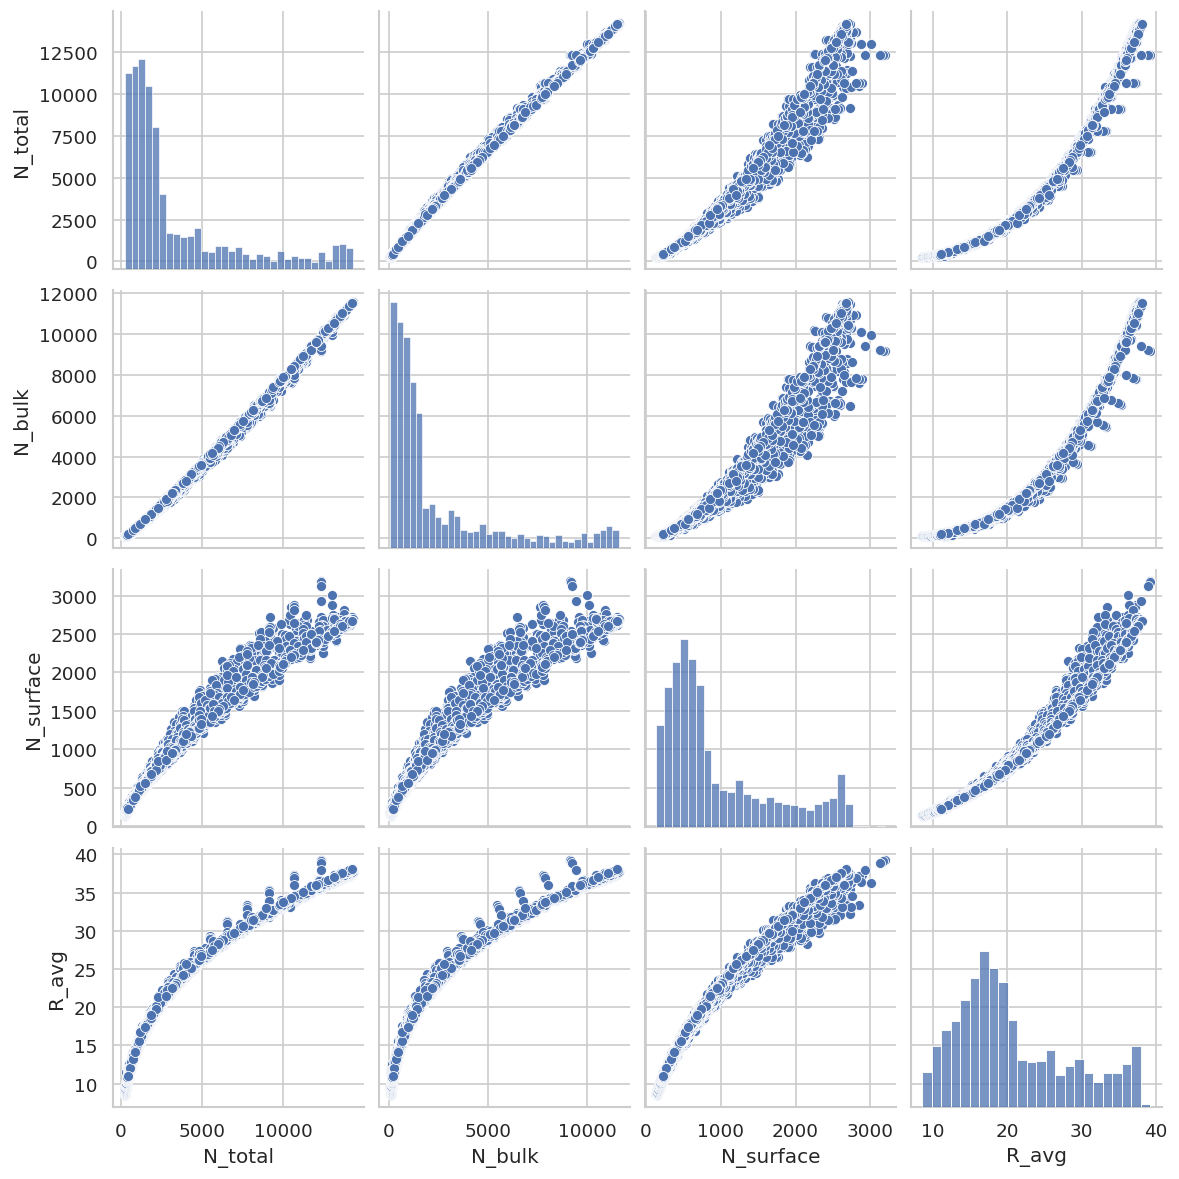

In [ ]:
sns.pairplot(new_df, diag_kind="hist")  # basic view
plt.show()
